# Introducing PySpark SQL

While we can directly analyze data using Spark’s Resilient Distributed Datasets (RDDs), we may not always want to perform complicated analysis directly on RDDs. Luckily, Spark offers a module called Spark SQL that can make common data analysis tasks simpler and faster. In this lesson, we’ll introduce Spark SQL and demonstrate how it can be a powerful tool for accelerating the analysis of distributed datasets.

The name Spark SQL is an umbrella term, as there are several ways to interact with data when using this module. We’ll cover two of these methods using the PySpark API:

* First, we’ll learn the basics of inspecting and querying data in a Spark DataFrame.

* Then, we’ll perform these same operations using standard SQL directly in our PySpark code.

Before using either method, we must start a SparkSession, the entry point to Spark SQL. The session is a wrapper around a sparkContext and contains all the metadata required to start working with distributed data.

The code below uses SparkSession.builder to set configuration parameters and create a new session. In the following example, we set one configuration parameter (spark.app.name) and call the .getOrCreate() method to initialize the new SparkSession.

In [1]:
from pyspark.sql import SparkSession
import findspark
findspark.init()

spark = SparkSession.builder\
    .config('spark.app.name', 'learning_spark_sql')\
    .getOrCreate()

We can access the SparkContext for a session with SparkSession.sparkContext.

In [2]:
print(spark.sparkContext) 
# <SparkContext master=local[*] appName=learning_spark_sql>

<SparkContext master=local[*] appName=learning_spark_sql>


From here, we can use the SparkSession to create DataFrames, read external files, register tables, and run SQL queries over saved data. When we’re done with our analysis, we can clear the Spark cache and terminate the session with SparkSession.stop(). Now that we’re familiar with the basics of SparkSession, the next step is to begin using Spark SQL to interact with data!

### Practice

https://spark.apache.org/docs/latest/configuration.html#available-properties

## Creating Spark DataFrames

A PySpark SQL DataFrame is a distributed collection of data with a specific row and column structure. Under the hood, DataFrames are built on top of RDDs. Like pandas, PySpark SQL DataFrames allow a developer to analyze data more easily than by writing functions directly on underlying data.

DataFrames can be created manually from RDDs using rdd.toDF(["names", "of", "columns"]). In the example below, we create a DataFrame from a manually constructed RDD and name its columns article_title and view_count.

In [3]:
# Create an RDD from a list
hrly_views_rdd  = spark.sparkContext.parallelize([
    ["Betty_White" , 288886],
    ["Main_Page", 139564],
    ["New_Year's_Day", 7892],
    ["ABBA", 8154]
])

# Convert RDD to DataFrame
hrly_views_df = hrly_views_rdd\
    .toDF(["article_title", "view_count"])

Let’s take a look at our new DataFrame. We can use the DataFrame.show(n_rows) method to print the first n_rows of a Spark DataFrame. It can also be helpful to pass truncate=False to ensure all columns are visible.

In [4]:
hrly_views_df.show(4, truncate=False)

+--------------+----------+
|article_title |view_count|
+--------------+----------+
|Betty_White   |288886    |
|Main_Page     |139564    |
|New_Year's_Day|7892      |
|ABBA          |8154      |
+--------------+----------+



Great! Now that this data is loaded in as a DataFrame, we can access the underlying RDD with DataFrame.rdd. You likely won’t need the underlying data often, but it can be helpful to keep in mind that a DataFrame is a structure built on top of an RDD. When we check the type of hrly_views_df_rdd, we can see that it’s an RDD!

In [5]:
# Access DataFrame's underlying RDD
hrly_views_df_rdd = hrly_views_df.rdd

# Check object type
print(type(hrly_views_df_rdd)) 
# <class 'pyspark.rdd.RDD'>

<class 'pyspark.rdd.RDD'>


### Practice

1.
Because we learned about SparkSession in the first exercise, all remaining exercises in this lesson will include the code to create a SparkSession named spark for you to use. Be sure to run these cells!

Using the RDD sample_page_views, create a DataFrame named sample_page_views_df with columns named language_code, title, date, and count.

In the same code cell, add code to show the first five rows of the DataFrame. Set truncate=False to ensure all columns are visible.

In [6]:
from pyspark.sql import SparkSession
import findspark
findspark.init()

# Create a new SparkSession
spark = SparkSession\
    .builder\
    .config('spark.app.name', 'learning_spark_sql')\
    .getOrCreate()

sample_page_views  = spark.sparkContext.parallelize([
    ["en", "Statue_of_Liberty", "2022-01-01", 263],
    ["en", "Replicas_of_the_Statue_of_Liberty", "2022-01-01", 11],
    ["en", "Statue_of_Lucille_Ball" ,"2022-01-01", 6],
    ["en", "Statue_of_Liberty_National_Monument", "2022-01-01", 4],
    ["en", "Statue_of_Liberty_play"  ,"2022-01-01", 3],  
])

In [7]:
## YOUR SOLUTION HERE ##
sample_page_views_df = sample_page_views.toDF(['language_code', 'title', 'date', 'count'])

# show first 5 rows
sample_page_views_df.show(5, truncate=False)

+-------------+-----------------------------------+----------+-----+
|language_code|title                              |date      |count|
+-------------+-----------------------------------+----------+-----+
|en           |Statue_of_Liberty                  |2022-01-01|263  |
|en           |Replicas_of_the_Statue_of_Liberty  |2022-01-01|11   |
|en           |Statue_of_Lucille_Ball             |2022-01-01|6    |
|en           |Statue_of_Liberty_National_Monument|2022-01-01|4    |
|en           |Statue_of_Liberty_play             |2022-01-01|3    |
+-------------+-----------------------------------+----------+-----+



2.
Access the RDD underlying sample_page_views_df and save it as sample_page_views_rdd_restored. In the same code cell, run sample_page_views_rdd_restored.collect() to view the restored RDD.

Note: You may notice that the restored RDD is not identical to the original RDD! Although the data is the same, when we converted the data to a DataFrame, PySpark automatically wrapped the original content into a Row. Behind the scenes, rows allow for more efficient calculations over large distributed data.

In [8]:
## YOUR SOLUTION HERE ##
sample_page_views_rdd_restored = sample_page_views_df.rdd

# show restored RDD
sample_page_views_rdd_restored.collect()

[Row(language_code='en', title='Statue_of_Liberty', date='2022-01-01', count=263),
 Row(language_code='en', title='Replicas_of_the_Statue_of_Liberty', date='2022-01-01', count=11),
 Row(language_code='en', title='Statue_of_Lucille_Ball', date='2022-01-01', count=6),
 Row(language_code='en', title='Statue_of_Liberty_National_Monument', date='2022-01-01', count=4),
 Row(language_code='en', title='Statue_of_Liberty_play', date='2022-01-01', count=3)]

## Spark DataFrames from External Sources

In this exercise, we’ll learn how to pull in larger datasets from external sources. To start, we’ll be using a dataset from Wikipedia that counts views of all articles by hour. For demonstration’s sake, we’ll use the first hour of 2022. Let’s take a look at the code we might use to read a CSV of this data from a location on disk.

In [9]:
print(type(spark.read)) 
# <class 'pyspark.sql.readwriter.DataFrameReader'>

# Read CSV to DataFrame
hrly_views_df = spark.read.option('header', True).option('delimiter', ' ').option('inferSchema', True).csv('views_2022_01_01_000000.csv')

<class 'pyspark.sql.readwriter.DataFrameReader'>


There are a few things going on in this code, let’s go through them one at a time:

This code uses the SparkSession.read function to create a new DataFrameReader

The DataFrameReader has an .option('option_name', 'option_value') method that can be used to instruct Spark how exactly to read a file. In this case, we used the following options:

* .option('header', True) — Indicate the file already contains a header row. By default, Spark assumes there is no header.

* .option('delimiter', ' ') — Indicates each column is separated by a space (‘ ‘). By default, Spark assumes CSV columns are separated by commas.

* .option('inferSchema', True) — Instructs Spark to sample a subset of rows before determining each column’s type. By default, Spark will treat all CSV columns as strings.

The DataFrameReader also has a .csv('path') method which loads a CSV file and returns the result as a DataFrame. There are a few quick ways of checking that our data has been read in properly. The most direct way is checking DataFrame.show().

In [10]:
# Display first 5 rows of DataFrame
hrly_views_df.show(5, truncate=False)

+------------------+-------------------+-----------------+-------------------+
|domain            |uniq_human_visitors|uniq_bot_visitors|total_visitor_count|
+------------------+-------------------+-----------------+-------------------+
|en.m.wikipedia.org|33261399           |8400247          |41661646           |
|en.wikipedia.org  |17009339           |4851741          |21861080           |
|es.m.wikipedia.org|5668575            |1977289          |7645864            |
|ru.m.wikipedia.org|5816762            |1367179          |7183941            |
|ja.m.wikipedia.org|5396108            |1325212          |6721320            |
+------------------+-------------------+-----------------+-------------------+
only showing top 5 rows



Looks Good! In this exercise, we used a DataFrameReader to pull a CSV from disk into our local Spark environment. However, Spark can read a wide variety of file formats. You can refer to the PySpark documentation to explore all available DataFrameReader options and file formats. In the following exercise, we’ll start to analyze the contents of this file.

https://spark.apache.org/docs/latest/api/python/search.html?q=DataFrameReader

### Practice


The file wiki_uniq_march_2022.csv contains the estimated count of unique visitors to each Wikipedia domain on March 1st, 2022. The file has the following layout:

* Site/Project Name (string)

* Estimated Human Visitors (int)

* Estimated Bot Visitors (int)

* Total Traffic (int)

You can read more about how Wikipedia estimates these values here.

First, let’s load the data from wiki_uniq_march_2022.csv as a DataFrame named wiki_uniq_df and display the first 10 rows in the notebook with truncate = False. For the moment, do not add any options when reading the file.

In [11]:
from pyspark.sql import SparkSession
import findspark
findspark.init()

# Create a new SparkSession
spark = SparkSession\
    .builder\
    .config('spark.app.name', 'learning_spark_sql')\
    .getOrCreate()

In [12]:
## YOUR SOLUTION HERE ##
wiki_uniq_df = spark.read.csv('wiki_uniq_march_2022.csv')

# show the first 10 rows
wiki_uniq_df.show(10, truncate=False)

+------------------+-------------------+-----------------+-------------------+
|_c0               |_c1                |_c2              |_c3                |
+------------------+-------------------+-----------------+-------------------+
|domain            |uniq_human_visitors|uniq_bot_visitors|total_visitor_count|
|en.m.wikipedia.org|33261399           |8400247          |41661646           |
|en.wikipedia.org  |17009339           |4851741          |21861080           |
|es.m.wikipedia.org|5668575            |1977289          |7645864            |
|ru.m.wikipedia.org|5816762            |1367179          |7183941            |
|ja.m.wikipedia.org|5396108            |1325212          |6721320            |
|de.m.wikipedia.org|4439596            |853251           |5292847            |
|fr.m.wikipedia.org|3798528            |904567           |4703095            |
|ru.wikipedia.org  |2852296            |687501           |3539797            |
|es.wikipedia.org  |2460489            |962516      

We’ve read the file, but the result doesn’t quite look right! This file has a header row.

Pass the option to the DataFrameReader that will read the file and create a header from the first row. Name this DataFrame wiki_uniq_w_header_df. In the same code cell, show the first 10 rows of wiki_uniq_w_header_df with truncate=False to check the header has loaded properly.

In [13]:
## YOUR SOLUTION HERE ##
wiki_uniq_w_header_df = spark.read\
    .option('header', True)\
    .csv('wiki_uniq_march_2022.csv')

# show the first 10 rows
wiki_uniq_w_header_df.show(10, truncate=False)

+------------------+-------------------+-----------------+-------------------+
|domain            |uniq_human_visitors|uniq_bot_visitors|total_visitor_count|
+------------------+-------------------+-----------------+-------------------+
|en.m.wikipedia.org|33261399           |8400247          |41661646           |
|en.wikipedia.org  |17009339           |4851741          |21861080           |
|es.m.wikipedia.org|5668575            |1977289          |7645864            |
|ru.m.wikipedia.org|5816762            |1367179          |7183941            |
|ja.m.wikipedia.org|5396108            |1325212          |6721320            |
|de.m.wikipedia.org|4439596            |853251           |5292847            |
|fr.m.wikipedia.org|3798528            |904567           |4703095            |
|ru.wikipedia.org  |2852296            |687501           |3539797            |
|es.wikipedia.org  |2460489            |962516           |3423005            |
|it.m.wikipedia.org|2806943            |566876      

In [14]:
# show the data types
wiki_uniq_w_header_df.dtypes

[('domain', 'string'),
 ('uniq_human_visitors', 'string'),
 ('uniq_bot_visitors', 'string'),
 ('total_visitor_count', 'string')]

This result is better, but we haven’t specified the types for the DataFrame yet. Check the data types for each column in wiki_uniq_w_header_df by running the provided code.

It looks like PySpark defaults to strings as the data types for all columns when we don’t specify them somehow.

Read the data in again, this time passing an option to the DataFrameReader that will tell Spark to sample rows to determine the file schema. Name this DataFrame wiki_uniq_w_schema_df. In the same code cell, run the provided code to check the data types in the new DataFrame.

In [15]:
## YOUR SOLUTION HERE ##
wiki_uniq_w_schema_df = spark.read\
    .option('header', True)\
    .option('delimiter', ',')\
    .option('inferSchema', True)\
    .csv('wiki_uniq_march_2022.csv')

# show the data types
wiki_uniq_w_schema_df.dtypes

[('domain', 'string'),
 ('uniq_human_visitors', 'int'),
 ('uniq_bot_visitors', 'int'),
 ('total_visitor_count', 'int')]

## Inspecting and Cleaning Data With PySpark

In this exercise, we’re going to start to analyze our pageview data and learn how Spark can help with data exploration. Like Pandas, Spark DataFrames offer a series of operations for cleaning, inspecting, and transforming data. Earlier in the lesson, we mentioned that all DataFrames have a schema that defines their structure, columns, and datatypes. We can use DataFrame.printSchema() to show a DataFrame’s schema.

In [16]:
# Display DataFrame schema
hrly_views_df.printSchema()

root
 |-- domain: string (nullable = true)
 |-- uniq_human_visitors: integer (nullable = true)
 |-- uniq_bot_visitors: integer (nullable = true)
 |-- total_visitor_count: integer (nullable = true)



We can then use DataFrame.describe() to see a high-level summary of the data by column. The result of DataFrame.describe() is a DataFrame in itself, so we append .show() to get it to display in our notebook.

In [17]:
hrly_views_df_desc = hrly_views_df.describe()
hrly_views_df_desc.show(truncate=False)

+-------+----------------+-------------------+-----------------+-------------------+
|summary|domain          |uniq_human_visitors|uniq_bot_visitors|total_visitor_count|
+-------+----------------+-------------------+-----------------+-------------------+
|count  |760             |760                |760              |760                |
|mean   |NULL            |155413.0394736842  |51431.0552631579 |206844.09473684212 |
|stddev |NULL            |1435327.5409314982 |376318.441663093 |1809320.9789242456 |
|min    |aa.wikibooks.org|0                  |170              |1005               |
|max    |zu.wikipedia.org|33261399           |8400247          |41661646           |
+-------+----------------+-------------------+-----------------+-------------------+



Because this data was taken from the first hour of the month, it looks like the column monthly_count only contains zeros. Because it contains no meaningful information, we can drop this field with DataFrame.drop("columns", "to", "drop").

The data is starting to look pretty good, but let’s make one more adjustment. The column article_title is a bit misleading: it seems this data contains articles, files, image pages, and wikipedia metadata pages. We can replace this misleading header with a better name using DataFrame.withColumnRenamed().

You may have noticed that Spark assigned all columns nullable = true. Intuitively, we know that article_title shouldn’t be null, but when the DataFrameReader reads a CSV, it assigns nullable = true to all columns. This is fine for now, but in some scenarios, you may wish to explicitly define a file’s schema. If interested, you can refer to PySpark’s documentation on defining a file’s schema. https://spark.apache.org/docs/latest/api/python/reference/pyspark.sql/api/pyspark.sql.DataFrame.schema.html

### Practice

The code to read in the Wikipedia unique data has already been written. Let’s find out if the number and types of columns in the DataFrame look correct. Print the schema of the DataFrame.

In [18]:
from pyspark.sql import SparkSession
import findspark
findspark.init()

spark = SparkSession \
    .builder \
    .appName("learning_spark_sql") \
    .getOrCreate()

# read in the Wikipedia unique visitors dataset
uniq_views_df = spark.read\
    .option('header', True) \
    .option('delimiter', ',') \
    .option('inferSchema', True) \
    .csv("wiki_uniq_march_2022.csv")

In [19]:
## YOUR SOLUTION HERE ##
uniq_views_df.printSchema()

root
 |-- domain: string (nullable = true)
 |-- uniq_human_visitors: integer (nullable = true)
 |-- uniq_bot_visitors: integer (nullable = true)
 |-- total_visitor_count: integer (nullable = true)



Let’s summarize this data and find out the mean total number of visitors per site. Save a high-level summary of the DataFrame to a new DataFrame named uniq_counts_df_desc and display it in the notebook.

In [20]:
## YOUR SOLUTION HERE ##
uniq_views_df_desc = uniq_views_df.describe()

# show summary
uniq_views_df_desc.show()

+-------+----------------+-------------------+-----------------+-------------------+
|summary|          domain|uniq_human_visitors|uniq_bot_visitors|total_visitor_count|
+-------+----------------+-------------------+-----------------+-------------------+
|  count|             760|                760|              760|                760|
|   mean|            NULL|  155413.0394736842| 51431.0552631579| 206844.09473684212|
| stddev|            NULL| 1435327.5409314982| 376318.441663093| 1809320.9789242456|
|    min|aa.wikibooks.org|                  0|              170|               1005|
|    max|zu.wikipedia.org|           33261399|          8400247|           41661646|
+-------+----------------+-------------------+-----------------+-------------------+



We found out that the mean total number of visitors per site is about 206,844. Let’s assume our analysis is focused on only the uniq_human_visitors. Write code to drop total_visitor_count and uniq_bot_visitors. Save the result to a DataFrame named uniq_counts_human_df and show the first 5 rows.

In [21]:
## YOUR SOLUTION HERE ##
uniq_counts_human_df = uniq_views_df.drop('uniq_bot_visitors','total_visitor_count')

# show the first 5 rows
uniq_counts_human_df.show(5)

+------------------+-------------------+
|            domain|uniq_human_visitors|
+------------------+-------------------+
|en.m.wikipedia.org|           33261399|
|  en.wikipedia.org|           17009339|
|es.m.wikipedia.org|            5668575|
|ru.m.wikipedia.org|            5816762|
|ja.m.wikipedia.org|            5396108|
+------------------+-------------------+
only showing top 5 rows



Finally, let’s rename the column uniq_human_visitors to something a bit more descriptive. Rename uniq_human_visitors to unique_site_visitors. Save the new DataFrame as uniq_counts_final_df and show the first 5 rows.

In [22]:
## YOUR SOLUTION HERE ##
uniq_counts_final_df = uniq_counts_human_df.withColumnRenamed('uniq_human_visitors', 'unique_site_visitors' )

# show the first 5 rows
uniq_counts_final_df.show(5)

+------------------+--------------------+
|            domain|unique_site_visitors|
+------------------+--------------------+
|en.m.wikipedia.org|            33261399|
|  en.wikipedia.org|            17009339|
|es.m.wikipedia.org|             5668575|
|ru.m.wikipedia.org|             5816762|
|ja.m.wikipedia.org|             5396108|
+------------------+--------------------+
only showing top 5 rows



## Querying PySpark DataFrames

It’s time to start performing some analysis–this is where PySpark SQL really shines. PySpark SQL DataFrames have a variety of built-in methods that can help with analyzing data. Let’s get into a few examples!

Imagine we’d like to filter our data to pages from a specific Wikipedia language_code (e.g., "kw.m"). This site is not very active, so it’s easy to use all of this hour’s data for demonstration purposes. We can display this result with the code below:

In [28]:
hrly_views_df = spark.read\
    .option('header', True) \
    .option('delimiter', ',') \
    .option('inferSchema', True) \
    .csv("wiki_uniq_march_2022_w_site_type.csv")

hrly_views_df\
    .filter(hrly_views_df.language_code == "hi")\
    .show(truncate=False)

+-------------------+-------------------+-----------------+-------------------+-------------+----------+
|domain             |uniq_human_visitors|uniq_bot_visitors|total_visitor_count|language_code|site_type |
+-------------------+-------------------+-----------------+-------------------+-------------+----------+
|hi.m.wikipedia.org |372427             |197143           |569570             |hi           |wikipedia |
|hi.wikipedia.org   |14706              |7714             |22420              |hi           |wikipedia |
|hi.m.wiktionary.org|718                |3446             |4164               |hi           |wiktionary|
|hi.m.wikibooks.org |720                |1661             |2381               |hi           |wikibooks |
|hi.wiktionary.org  |116                |940              |1056               |hi           |wiktionary|
+-------------------+-------------------+-----------------+-------------------+-------------+----------+



This code uses the DataFrame.filter() method to select relevant rows. This is analogous to a SQL “WHERE” clause. In this case, our condition checks the column language_code for the value "kw.m". What if we want to remove the monthly_count column and display the data ordered by the hourly_count? To do so, we could use the following:

In [30]:
hrly_views_df\
    .filter(hrly_views_df.language_code == "kw.m")\
    .select(['language_code', 'article_title', 'hourly_count'])\
    .orderBy('hourly_count', ascending=False).show(5, truncate=False)

AnalysisException: [UNRESOLVED_COLUMN.WITH_SUGGESTION] A column or function parameter with name `article_title` cannot be resolved. Did you mean one of the following? [`site_type`, `domain`, `language_code`, `uniq_bot_visitors`, `uniq_human_visitors`].;
'Project [language_code#1037, 'article_title, 'hourly_count]
+- Filter (language_code#1037 = kw.m)
   +- Relation [domain#1033,uniq_human_visitors#1034,uniq_bot_visitors#1035,total_visitor_count#1036,language_code#1037,site_type#1038] csv


* DataFrame.select() is used to choose which columns to return in our result. You can think of DataFrame.select(["A", "B", "C"]) as analogous to SELECT A, B, C FROM DataFrame in SQL.

* DataFrame.orderBy() is analogous to SQL’s ORDER BY. We use .orderBy('hourly_count', ascending=False) to specify the sort column and order logic. This would be analogous to ORDER BY hourly_count DESC in SQL.

What if we’d like to select the sum of hourly_count by language_code? This could help us answer questions like “Which sites were most active this hour?” We can do that with the following:

In [ ]:
hrly_views_df\
    .select(['language_code', 'hourly_count'])\
    .groupBy('language_code')\
    .sum() \
    .orderBy('sum(hourly_count)', ascending=False)\
    .show(5, truncate=False)

This code uses DataFrame.groupBy('language_code').sum() to calculate the sum of all columns grouped by language_code, .groupBy(field) and .sum() are analogous to SQL’s GROUP BY and SUM functions respectively. This code also orders our results with .orderBy(), using the name of the constructed column, 'sum(hourly_count)'.

There are many ways to use the DataFrame methods to query our data. However, if you’re familiar with SQL, you may prefer to use standard SQL statements. In the next section, we’ll explore how you can use standard SQL to explore data with PySpark.

### Practice

For this exercise, a slightly modified version of the dataset you’ve been working with has been created (‘wiki_uniq_march_2022_w_site_type.csv’). The dataset now has two additional columns: language_code and site_type. Let’s find out how many domains there are for the "ar" language code. Filter the dataset to the rows for the language code "ar". Save your result as a DataFrame named ar_site_visitors and display it in the notebook.

In [31]:
from pyspark.sql import SparkSession
import findspark
findspark.init()

# Create a New SparkSession
spark = SparkSession \
    .builder \
    .appName("learning_spark_sql") \
    .getOrCreate()

# Read in Wikipedia Unique Visitors Dataset
wiki_uniq_df = spark.read\
    .option('header', True) \
    .option('delimiter', ',') \
    .option('inferSchema', True) \
    .csv("wiki_uniq_march_2022_w_site_type.csv")

In [33]:
## YOUR SOLUTION HERE ##
ar_site_visitors = wiki_uniq_df.filter(wiki_uniq_df.language_code == 'ar')

# show the DataFrame
ar_site_visitors.show()

+--------------------+-------------------+-----------------+-------------------+-------------+-----------+
|              domain|uniq_human_visitors|uniq_bot_visitors|total_visitor_count|language_code|  site_type|
+--------------------+-------------------+-----------------+-------------------+-------------+-----------+
|  ar.m.wikipedia.org|            1644253|           750620|            2394873|           ar|  wikipedia|
|    ar.wikipedia.org|             212695|            97700|             310395|           ar|  wikipedia|
| ar.m.wikisource.org|              56124|            52885|             109009|           ar| wikisource|
|   ar.wikisource.org|               2134|             4355|               6489|           ar| wikisource|
|  ar.m.wikiquote.org|                776|             3511|               4287|           ar|  wikiquote|
|   ar.wiktionary.org|                262|             2335|               2597|           ar| wiktionary|
| ar.m.wiktionary.org|               

Now let’s find out which domain was visited the most. Filter the dataset to the rows for the language code "ar" and the columns domain and uniq_human_visitors. Save your result as a DataFrame named ar_visitors_slim and display it in the notebook

In [34]:
## YOUR SOLUTION HERE ##
ar_visitors_slim = ar_site_visitors.select(['domain','uniq_human_visitors'])

# show the DataFrame
ar_visitors_slim.show()

+--------------------+-------------------+
|              domain|uniq_human_visitors|
+--------------------+-------------------+
|  ar.m.wikipedia.org|            1644253|
|    ar.wikipedia.org|             212695|
| ar.m.wikisource.org|              56124|
|   ar.wikisource.org|               2134|
|  ar.m.wikiquote.org|                776|
|   ar.wiktionary.org|                262|
| ar.m.wiktionary.org|                448|
|ar.m.wikiversity.org|                389|
|  ar.m.wikibooks.org|                378|
+--------------------+-------------------+



Calculate the sum of all uniq_human_visitors grouped by site_type and ordered from highest to lowest by sum of visitors. Save your result as a DataFrame named top_visitors_site_type and display it in the notebook.

In [37]:
## YOUR SOLUTION HERE ##
top_visitors_site_type = wiki_uniq_df\
                                    .select(['site_type','uniq_human_visitors'])\
                                    .groupBy('site_type')\
                                    .sum()\
                                    .orderBy('sum(uniq_human_visitors)', ascending=False)

# show the DataFrame
top_visitors_site_type.show()

+-----------+------------------------+
|  site_type|sum(uniq_human_visitors)|
+-----------+------------------------+
|  wikipedia|               116527479|
| wiktionary|                  892193|
|  wikimedia|                  312995|
| wikisource|                  172179|
|   wikidata|                   69744|
|  wikibooks|                   54680|
|  wikiquote|                   38048|
| wikivoyage|                   14648|
|       wiki|                   13067|
|wikiversity|                   12548|
|   wikinews|                    5578|
|   wikitech|                     751|
+-----------+------------------------+



## Querying PySpark with SQL

PySpark DataFrame’s query methods are an improvement on performing analysis directly on RDDs. However, working with DataFrame methods still requires some practice, and the code can become quite verbose. Luckily, we can analyze data in Spark with standard SQL through the SparkSession.sql() method. This exercise will closely mirror the previous one, and we’ll answer the same questions from that exercise using standard SQL.

Before querying a DataFrame with SQL in Spark, it must be saved to the SparkSession’s catalog. The following code saves the DataFrame as a local temporary view in memory. As long as the current SparkSession is active, we can use SparkSession.sql() to query it.

In [ ]:
hrly_views_df.createOrReplaceTempView('hourly_counts')

Each of the three sections of SQL below performs the same function as the DataFrame query methods described in the previous exercise. With the query below, we can filter our data to pages from a specific Wikipedia language_code (e.g., "kw.m") using a WHERE clause.

In [ ]:
query = """SELECT * FROM hourly_counts WHERE language_code = 'kw.m'"""
spark.sql(query).show(truncate=False)

In the query below, we display all pages with "kw.m" as their language_code ordered by the hourly_count using an ORDER BY clause.

In [ ]:
query = """SELECT language_code, article_title, hourly_count
    FROM hourly_counts
    WHERE language_code = 'kw.m'
    ORDER BY hourly_count DESC"""

spark.sql(query).show(truncate=False)

Finally, we select the sum of hourly_count by language_code over the entire DataFrame using a SQL statement with GROUP BY, SUM, and ORDER BY.

In [ ]:
query = """SELECT language_code, SUM(hourly_count) as sum_hourly_count
    FROM hourly_counts
    GROUP BY language_code
    ORDER BY sum_hourly_count DESC"""

spark.sql(query).show(5, truncate=False)

Although querying data with SQL and DataFrame methods may look quite different, behind the scenes, Spark SQL translates everything to the same internal code. This means that as a developer, you can focus more on writing code for analysis in your preferred style rather than low-level execution details.

### Practice

The DataFrame wiki_uniq_df has been saved to the current SparkSession as a temporary view named uniq_visitors_march.

Write the SQL query that filters the dataset to the rows where language_code is 'ar'. Save your SQL string as a variable named ar_site_visitors_qry. Run that query and display the resulting DataFrame in the notebook.

In [38]:
from pyspark.sql import SparkSession

# Create a new SparkSession
spark = SparkSession \
    .builder \
    .appName("learning_spark_sql") \
    .getOrCreate()

# Read in Wikipedia Unique Visitors Dataset
wiki_uniq_df = spark.read\
    .option('header', True) \
    .option('delimiter', ',') \
    .option('inferSchema', True) \
    .csv("wiki_uniq_march_2022_w_site_type.csv")

# Create a temporary view with the DataFrame
wiki_uniq_df\
    .createOrReplaceTempView('uniq_visitors_march')

In [40]:
## YOUR SOLUTION HERE ##
ar_site_visitors_qry = """ 
Select
    *
From
    uniq_visitors_march
Where 
    language_code='ar'
"""

# show the DataFrame
spark.sql(ar_site_visitors_qry).show(truncate=False)

+--------------------+-------------------+-----------------+-------------------+-------------+-----------+
|domain              |uniq_human_visitors|uniq_bot_visitors|total_visitor_count|language_code|site_type  |
+--------------------+-------------------+-----------------+-------------------+-------------+-----------+
|ar.m.wikipedia.org  |1644253            |750620           |2394873            |ar           |wikipedia  |
|ar.wikipedia.org    |212695             |97700            |310395             |ar           |wikipedia  |
|ar.m.wikisource.org |56124              |52885            |109009             |ar           |wikisource |
|ar.wikisource.org   |2134               |4355             |6489               |ar           |wikisource |
|ar.m.wikiquote.org  |776                |3511             |4287               |ar           |wikiquote  |
|ar.wiktionary.org   |262                |2335             |2597               |ar           |wiktionary |
|ar.m.wiktionary.org |448            

Filter the dataset to the rows where language_code is 'ar' and the columns are domain and uniq_human_visitors. Save your SQL string as a variable named ar_site_visitors_slim_qry. Run that query and display the resulting DataFrame in the notebook.

In [41]:
## YOUR SOLUTION HERE ##
ar_site_visitors_slim_qry = """ 
Select
    domain
    ,uniq_human_visitors
From
    uniq_visitors_march
Where 
    language_code='ar'
"""
# show the DataFrame
spark.sql(ar_site_visitors_slim_qry).show(truncate=False)

+--------------------+-------------------+
|domain              |uniq_human_visitors|
+--------------------+-------------------+
|ar.m.wikipedia.org  |1644253            |
|ar.wikipedia.org    |212695             |
|ar.m.wikisource.org |56124              |
|ar.wikisource.org   |2134               |
|ar.m.wikiquote.org  |776                |
|ar.wiktionary.org   |262                |
|ar.m.wiktionary.org |448                |
|ar.m.wikiversity.org|389                |
|ar.m.wikibooks.org  |378                |
+--------------------+-------------------+



Calculate the sum of all uniq_human_visitors grouped by site_type and ordered from highest to lowest by sum of visitors. Save your SQL string as a variable named site_top_type_qry. Run that query and display the resulting DataFrame in the notebook.

In [42]:
## YOUR SOLUTION HERE ##
site_top_type_qry = """ 
Select
    site_type
    ,sum(uniq_human_visitors)
From
    uniq_visitors_march
Group by 
    site_type
Order by 
    sum(uniq_human_visitors) desc
"""

# show the DataFrame
spark.sql(site_top_type_qry).show(truncate=False)

+-----------+------------------------+
|site_type  |sum(uniq_human_visitors)|
+-----------+------------------------+
|wikipedia  |116527479               |
|wiktionary |892193                  |
|wikimedia  |312995                  |
|wikisource |172179                  |
|wikidata   |69744                   |
|wikibooks  |54680                   |
|wikiquote  |38048                   |
|wikivoyage |14648                   |
|wiki       |13067                   |
|wikiversity|12548                   |
|wikinews   |5578                    |
|wikitech   |751                     |
+-----------+------------------------+



## Saving PySpark DataFrames

Once you’ve done some analysis, the next step is often saving the transformed data back to disk for others to use. In this final topic, we’re going to cover how to efficiently save PySpark DataFrames.

Similar to the SparkSession.read() method, Spark offers a SparkSession.write() method. Let’s perform a slight modification to our original Wikipedia views dataset and save it to disk. This code just uses .select() to select all columns except the monthly_count column (recall that earlier we discovered this column only contains zeros).

Because Spark runs all operations in parallel, it’s typical to write DataFrames to a directory of files rather than a single CSV file. In the example below, Spark will split the underlying dataset and write multiple CSV files to cleaned/csv/views_2022_01_01_000000/. We can also use the mode argument of the .csv() method to overwrite any existing data in the target directory.

In [ ]:
hrly_views_df\
    .select(['language_code', 'article_title', 'hourly_count'])\
    .write.csv('cleaned/csv/views_2022_01_01_000000/', mode="overwrite")

Using SparkSession.read(), we can read the data from disk and confirm that it looks the same as the DataFrame we saved.

In [ ]:
# Read DataFrame back from disk
hrly_views_df_restored = spark.read\
    .csv('cleaned/csv/views_2022_01_01_000000/')
hrly_views_df_restored.printSchema()

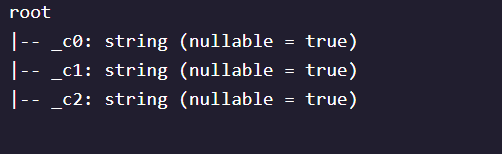

Close, but not quite! It looks like this file didn’t retain information about column headers or datatypes. Unfortunately, there’s no way for a CSV to retain information about its format. Each time we read it, we’ll need to tell Spark exactly how it must be processed.

Luckily, there is a file format called “Parquet” that’s specially designed for big data and solves this problem among many others. Parquet offers efficient data compression, is faster to perform analysis on than CSV, and preserves information about a dataset’s schema. Let’s try saving and re-reading this file to and from Parquet instead.

In [ ]:
# Write DataFrame to Parquet
hrly_views_slim_df
    .write.parquet('cleaned/parquet/views_2022_01_01_000000/', mode="overwrite")

# Read Parquet as DataFrame
hrly_views_df_restored = spark.read\
    .parquet('cleaned/parquet/views_2022_01_01_000000/')

# Check DataFrame's schema
hrly_views_df_restored.printSchema()

Great, now anyone who wants to query this data can do so with the much more efficient Parquet data format!

### Practice

Run the provided code to create a new DataFrame named uniq_human_visitors_df from wiki_uniq_df with only two columns: domain and uniq_human_visitors.

In [1]:
from pyspark.sql import SparkSession
import findspark
findspark.init()
# Create a new SparkSession
spark = SparkSession\
    .builder\
    .config('spark.app.name', 'learning_spark_sql')\
    .getOrCreate()

# Read in Wikipedia Unique Visitors Dataset
wiki_uniq_df = spark.read\
    .option('header', True) \
    .option('delimiter', ',') \
    .option('inferSchema', True) \
    .csv("wiki_uniq_march_2022.csv")

In [2]:
# select only domain and uniq_human visitors
uniq_human_visitors_df = wiki_uniq_df\
    .select('domain', 'uniq_human_visitors')

# show the new DataFrame
uniq_human_visitors_df.show()

+------------------+-------------------+
|            domain|uniq_human_visitors|
+------------------+-------------------+
|en.m.wikipedia.org|           33261399|
|  en.wikipedia.org|           17009339|
|es.m.wikipedia.org|            5668575|
|ru.m.wikipedia.org|            5816762|
|ja.m.wikipedia.org|            5396108|
|de.m.wikipedia.org|            4439596|
|fr.m.wikipedia.org|            3798528|
|  ru.wikipedia.org|            2852296|
|  es.wikipedia.org|            2460489|
|it.m.wikipedia.org|            2806943|
|  de.wikipedia.org|            2252670|
|  ja.wikipedia.org|            2128471|
|  fr.wikipedia.org|            1839196|
|zh.m.wikipedia.org|            2123391|
|ar.m.wikipedia.org|            1644253|
|pt.m.wikipedia.org|            1471752|
|pl.m.wikipedia.org|            1410339|
|fa.m.wikipedia.org|            1194940|
|  zh.wikipedia.org|            1088755|
|tr.m.wikipedia.org|             908573|
+------------------+-------------------+
only showing top

Now that we’ve modified a DataFrame, let’s persist the results as CSV files. Save uniq_human_visitors_df to a local directory, ./results/csv/uniq_human_visitors/.

In [4]:
uniq_human_visitors_df.write.csv('./results/csv/uniq_human_visitors/', mode="overwrite")

Py4JJavaError: An error occurred while calling o43.csv.
: java.lang.RuntimeException: java.io.FileNotFoundException: java.io.FileNotFoundException: HADOOP_HOME and hadoop.home.dir are unset. -see https://wiki.apache.org/hadoop/WindowsProblems
	at org.apache.hadoop.util.Shell.getWinUtilsPath(Shell.java:735)
	at org.apache.hadoop.util.Shell.getSetPermissionCommand(Shell.java:270)
	at org.apache.hadoop.util.Shell.getSetPermissionCommand(Shell.java:286)
	at org.apache.hadoop.fs.RawLocalFileSystem.setPermission(RawLocalFileSystem.java:978)
	at org.apache.hadoop.fs.RawLocalFileSystem.mkOneDirWithMode(RawLocalFileSystem.java:660)
	at org.apache.hadoop.fs.RawLocalFileSystem.mkdirsWithOptionalPermission(RawLocalFileSystem.java:700)
	at org.apache.hadoop.fs.RawLocalFileSystem.mkdirs(RawLocalFileSystem.java:672)
	at org.apache.hadoop.fs.RawLocalFileSystem.mkdirsWithOptionalPermission(RawLocalFileSystem.java:699)
	at org.apache.hadoop.fs.RawLocalFileSystem.mkdirs(RawLocalFileSystem.java:672)
	at org.apache.hadoop.fs.RawLocalFileSystem.mkdirsWithOptionalPermission(RawLocalFileSystem.java:699)
	at org.apache.hadoop.fs.RawLocalFileSystem.mkdirs(RawLocalFileSystem.java:672)
	at org.apache.hadoop.fs.ChecksumFileSystem.mkdirs(ChecksumFileSystem.java:788)
	at org.apache.hadoop.mapreduce.lib.output.FileOutputCommitter.setupJob(FileOutputCommitter.java:356)
	at org.apache.spark.internal.io.HadoopMapReduceCommitProtocol.setupJob(HadoopMapReduceCommitProtocol.scala:188)
	at org.apache.spark.sql.execution.datasources.FileFormatWriter$.writeAndCommit(FileFormatWriter.scala:269)
	at org.apache.spark.sql.execution.datasources.FileFormatWriter$.executeWrite(FileFormatWriter.scala:304)
	at org.apache.spark.sql.execution.datasources.FileFormatWriter$.write(FileFormatWriter.scala:190)
	at org.apache.spark.sql.execution.datasources.InsertIntoHadoopFsRelationCommand.run(InsertIntoHadoopFsRelationCommand.scala:190)
	at org.apache.spark.sql.execution.command.DataWritingCommandExec.sideEffectResult$lzycompute(commands.scala:113)
	at org.apache.spark.sql.execution.command.DataWritingCommandExec.sideEffectResult(commands.scala:111)
	at org.apache.spark.sql.execution.command.DataWritingCommandExec.executeCollect(commands.scala:125)
	at org.apache.spark.sql.execution.QueryExecution$$anonfun$eagerlyExecuteCommands$1.$anonfun$applyOrElse$1(QueryExecution.scala:107)
	at org.apache.spark.sql.execution.SQLExecution$.$anonfun$withNewExecutionId$6(SQLExecution.scala:125)
	at org.apache.spark.sql.execution.SQLExecution$.withSQLConfPropagated(SQLExecution.scala:201)
	at org.apache.spark.sql.execution.SQLExecution$.$anonfun$withNewExecutionId$1(SQLExecution.scala:108)
	at org.apache.spark.sql.SparkSession.withActive(SparkSession.scala:900)
	at org.apache.spark.sql.execution.SQLExecution$.withNewExecutionId(SQLExecution.scala:66)
	at org.apache.spark.sql.execution.QueryExecution$$anonfun$eagerlyExecuteCommands$1.applyOrElse(QueryExecution.scala:107)
	at org.apache.spark.sql.execution.QueryExecution$$anonfun$eagerlyExecuteCommands$1.applyOrElse(QueryExecution.scala:98)
	at org.apache.spark.sql.catalyst.trees.TreeNode.$anonfun$transformDownWithPruning$1(TreeNode.scala:461)
	at org.apache.spark.sql.catalyst.trees.CurrentOrigin$.withOrigin(origin.scala:76)
	at org.apache.spark.sql.catalyst.trees.TreeNode.transformDownWithPruning(TreeNode.scala:461)
	at org.apache.spark.sql.catalyst.plans.logical.LogicalPlan.org$apache$spark$sql$catalyst$plans$logical$AnalysisHelper$$super$transformDownWithPruning(LogicalPlan.scala:32)
	at org.apache.spark.sql.catalyst.plans.logical.AnalysisHelper.transformDownWithPruning(AnalysisHelper.scala:267)
	at org.apache.spark.sql.catalyst.plans.logical.AnalysisHelper.transformDownWithPruning$(AnalysisHelper.scala:263)
	at org.apache.spark.sql.catalyst.plans.logical.LogicalPlan.transformDownWithPruning(LogicalPlan.scala:32)
	at org.apache.spark.sql.catalyst.plans.logical.LogicalPlan.transformDownWithPruning(LogicalPlan.scala:32)
	at org.apache.spark.sql.catalyst.trees.TreeNode.transformDown(TreeNode.scala:437)
	at org.apache.spark.sql.execution.QueryExecution.eagerlyExecuteCommands(QueryExecution.scala:98)
	at org.apache.spark.sql.execution.QueryExecution.commandExecuted$lzycompute(QueryExecution.scala:85)
	at org.apache.spark.sql.execution.QueryExecution.commandExecuted(QueryExecution.scala:83)
	at org.apache.spark.sql.execution.QueryExecution.assertCommandExecuted(QueryExecution.scala:142)
	at org.apache.spark.sql.DataFrameWriter.runCommand(DataFrameWriter.scala:859)
	at org.apache.spark.sql.DataFrameWriter.saveToV1Source(DataFrameWriter.scala:388)
	at org.apache.spark.sql.DataFrameWriter.saveInternal(DataFrameWriter.scala:361)
	at org.apache.spark.sql.DataFrameWriter.save(DataFrameWriter.scala:240)
	at org.apache.spark.sql.DataFrameWriter.csv(DataFrameWriter.scala:850)
	at sun.reflect.NativeMethodAccessorImpl.invoke0(Native Method)
	at sun.reflect.NativeMethodAccessorImpl.invoke(Unknown Source)
	at sun.reflect.DelegatingMethodAccessorImpl.invoke(Unknown Source)
	at java.lang.reflect.Method.invoke(Unknown Source)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:244)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:374)
	at py4j.Gateway.invoke(Gateway.java:282)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:132)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.ClientServerConnection.waitForCommands(ClientServerConnection.java:182)
	at py4j.ClientServerConnection.run(ClientServerConnection.java:106)
	at java.lang.Thread.run(Unknown Source)
Caused by: java.io.FileNotFoundException: java.io.FileNotFoundException: HADOOP_HOME and hadoop.home.dir are unset. -see https://wiki.apache.org/hadoop/WindowsProblems
	at org.apache.hadoop.util.Shell.fileNotFoundException(Shell.java:547)
	at org.apache.hadoop.util.Shell.getHadoopHomeDir(Shell.java:568)
	at org.apache.hadoop.util.Shell.getQualifiedBin(Shell.java:591)
	at org.apache.hadoop.util.Shell.<clinit>(Shell.java:688)
	at org.apache.hadoop.util.StringUtils.<clinit>(StringUtils.java:79)
	at org.apache.hadoop.conf.Configuration.getTimeDurationHelper(Configuration.java:1907)
	at org.apache.hadoop.conf.Configuration.getTimeDuration(Configuration.java:1867)
	at org.apache.hadoop.conf.Configuration.getTimeDuration(Configuration.java:1840)
	at org.apache.hadoop.util.ShutdownHookManager.getShutdownTimeout(ShutdownHookManager.java:183)
	at org.apache.hadoop.util.ShutdownHookManager$HookEntry.<init>(ShutdownHookManager.java:207)
	at org.apache.hadoop.util.ShutdownHookManager.addShutdownHook(ShutdownHookManager.java:304)
	at org.apache.spark.util.SparkShutdownHookManager.install(ShutdownHookManager.scala:181)
	at org.apache.spark.util.ShutdownHookManager$.shutdownHooks$lzycompute(ShutdownHookManager.scala:50)
	at org.apache.spark.util.ShutdownHookManager$.shutdownHooks(ShutdownHookManager.scala:48)
	at org.apache.spark.util.ShutdownHookManager$.addShutdownHook(ShutdownHookManager.scala:153)
	at org.apache.spark.util.ShutdownHookManager$.<init>(ShutdownHookManager.scala:58)
	at org.apache.spark.util.ShutdownHookManager$.<clinit>(ShutdownHookManager.scala)
	at org.apache.spark.util.Utils$.createTempDir(Utils.scala:242)
	at org.apache.spark.util.SparkFileUtils.createTempDir(SparkFileUtils.scala:103)
	at org.apache.spark.util.SparkFileUtils.createTempDir$(SparkFileUtils.scala:102)
	at org.apache.spark.util.Utils$.createTempDir(Utils.scala:94)
	at org.apache.spark.deploy.SparkSubmit.prepareSubmitEnvironment(SparkSubmit.scala:372)
	at org.apache.spark.deploy.SparkSubmit.org$apache$spark$deploy$SparkSubmit$$runMain(SparkSubmit.scala:964)
	at org.apache.spark.deploy.SparkSubmit.doRunMain$1(SparkSubmit.scala:194)
	at org.apache.spark.deploy.SparkSubmit.submit(SparkSubmit.scala:217)
	at org.apache.spark.deploy.SparkSubmit.doSubmit(SparkSubmit.scala:91)
	at org.apache.spark.deploy.SparkSubmit$$anon$2.doSubmit(SparkSubmit.scala:1120)
	at org.apache.spark.deploy.SparkSubmit$.main(SparkSubmit.scala:1129)
	at org.apache.spark.deploy.SparkSubmit.main(SparkSubmit.scala)
Caused by: java.io.FileNotFoundException: HADOOP_HOME and hadoop.home.dir are unset.
	at org.apache.hadoop.util.Shell.checkHadoopHomeInner(Shell.java:467)
	at org.apache.hadoop.util.Shell.checkHadoopHome(Shell.java:438)
	at org.apache.hadoop.util.Shell.<clinit>(Shell.java:515)
	... 25 more


Parquet is PySpark’s preferred data format and saving our results in this format could expedite future analysis. Let’s persist the results as parquet files, too. Save uniq_human_visitors_df to a local directory, ./results/pq/uniq_human_visitors/

In [56]:
uniq_human_visitors_df.write.parquet('./results/pq/uniq_human_visitors/', mode="overwrite")

Py4JJavaError: An error occurred while calling o390.parquet.
: java.lang.RuntimeException: java.io.FileNotFoundException: java.io.FileNotFoundException: HADOOP_HOME and hadoop.home.dir are unset. -see https://wiki.apache.org/hadoop/WindowsProblems
	at org.apache.hadoop.util.Shell.getWinUtilsPath(Shell.java:735)
	at org.apache.hadoop.util.Shell.getSetPermissionCommand(Shell.java:270)
	at org.apache.hadoop.util.Shell.getSetPermissionCommand(Shell.java:286)
	at org.apache.hadoop.fs.RawLocalFileSystem.setPermission(RawLocalFileSystem.java:978)
	at org.apache.hadoop.fs.RawLocalFileSystem.mkOneDirWithMode(RawLocalFileSystem.java:660)
	at org.apache.hadoop.fs.RawLocalFileSystem.mkdirsWithOptionalPermission(RawLocalFileSystem.java:700)
	at org.apache.hadoop.fs.RawLocalFileSystem.mkdirs(RawLocalFileSystem.java:672)
	at org.apache.hadoop.fs.RawLocalFileSystem.mkdirsWithOptionalPermission(RawLocalFileSystem.java:699)
	at org.apache.hadoop.fs.RawLocalFileSystem.mkdirs(RawLocalFileSystem.java:672)
	at org.apache.hadoop.fs.RawLocalFileSystem.mkdirsWithOptionalPermission(RawLocalFileSystem.java:699)
	at org.apache.hadoop.fs.RawLocalFileSystem.mkdirs(RawLocalFileSystem.java:672)
	at org.apache.hadoop.fs.ChecksumFileSystem.mkdirs(ChecksumFileSystem.java:788)
	at org.apache.hadoop.mapreduce.lib.output.FileOutputCommitter.setupJob(FileOutputCommitter.java:356)
	at org.apache.spark.internal.io.HadoopMapReduceCommitProtocol.setupJob(HadoopMapReduceCommitProtocol.scala:188)
	at org.apache.spark.sql.execution.datasources.FileFormatWriter$.writeAndCommit(FileFormatWriter.scala:269)
	at org.apache.spark.sql.execution.datasources.FileFormatWriter$.executeWrite(FileFormatWriter.scala:304)
	at org.apache.spark.sql.execution.datasources.FileFormatWriter$.write(FileFormatWriter.scala:190)
	at org.apache.spark.sql.execution.datasources.InsertIntoHadoopFsRelationCommand.run(InsertIntoHadoopFsRelationCommand.scala:190)
	at org.apache.spark.sql.execution.command.DataWritingCommandExec.sideEffectResult$lzycompute(commands.scala:113)
	at org.apache.spark.sql.execution.command.DataWritingCommandExec.sideEffectResult(commands.scala:111)
	at org.apache.spark.sql.execution.command.DataWritingCommandExec.executeCollect(commands.scala:125)
	at org.apache.spark.sql.execution.QueryExecution$$anonfun$eagerlyExecuteCommands$1.$anonfun$applyOrElse$1(QueryExecution.scala:107)
	at org.apache.spark.sql.execution.SQLExecution$.$anonfun$withNewExecutionId$6(SQLExecution.scala:125)
	at org.apache.spark.sql.execution.SQLExecution$.withSQLConfPropagated(SQLExecution.scala:201)
	at org.apache.spark.sql.execution.SQLExecution$.$anonfun$withNewExecutionId$1(SQLExecution.scala:108)
	at org.apache.spark.sql.SparkSession.withActive(SparkSession.scala:900)
	at org.apache.spark.sql.execution.SQLExecution$.withNewExecutionId(SQLExecution.scala:66)
	at org.apache.spark.sql.execution.QueryExecution$$anonfun$eagerlyExecuteCommands$1.applyOrElse(QueryExecution.scala:107)
	at org.apache.spark.sql.execution.QueryExecution$$anonfun$eagerlyExecuteCommands$1.applyOrElse(QueryExecution.scala:98)
	at org.apache.spark.sql.catalyst.trees.TreeNode.$anonfun$transformDownWithPruning$1(TreeNode.scala:461)
	at org.apache.spark.sql.catalyst.trees.CurrentOrigin$.withOrigin(origin.scala:76)
	at org.apache.spark.sql.catalyst.trees.TreeNode.transformDownWithPruning(TreeNode.scala:461)
	at org.apache.spark.sql.catalyst.plans.logical.LogicalPlan.org$apache$spark$sql$catalyst$plans$logical$AnalysisHelper$$super$transformDownWithPruning(LogicalPlan.scala:32)
	at org.apache.spark.sql.catalyst.plans.logical.AnalysisHelper.transformDownWithPruning(AnalysisHelper.scala:267)
	at org.apache.spark.sql.catalyst.plans.logical.AnalysisHelper.transformDownWithPruning$(AnalysisHelper.scala:263)
	at org.apache.spark.sql.catalyst.plans.logical.LogicalPlan.transformDownWithPruning(LogicalPlan.scala:32)
	at org.apache.spark.sql.catalyst.plans.logical.LogicalPlan.transformDownWithPruning(LogicalPlan.scala:32)
	at org.apache.spark.sql.catalyst.trees.TreeNode.transformDown(TreeNode.scala:437)
	at org.apache.spark.sql.execution.QueryExecution.eagerlyExecuteCommands(QueryExecution.scala:98)
	at org.apache.spark.sql.execution.QueryExecution.commandExecuted$lzycompute(QueryExecution.scala:85)
	at org.apache.spark.sql.execution.QueryExecution.commandExecuted(QueryExecution.scala:83)
	at org.apache.spark.sql.execution.QueryExecution.assertCommandExecuted(QueryExecution.scala:142)
	at org.apache.spark.sql.DataFrameWriter.runCommand(DataFrameWriter.scala:859)
	at org.apache.spark.sql.DataFrameWriter.saveToV1Source(DataFrameWriter.scala:388)
	at org.apache.spark.sql.DataFrameWriter.saveInternal(DataFrameWriter.scala:361)
	at org.apache.spark.sql.DataFrameWriter.save(DataFrameWriter.scala:240)
	at org.apache.spark.sql.DataFrameWriter.parquet(DataFrameWriter.scala:792)
	at sun.reflect.NativeMethodAccessorImpl.invoke0(Native Method)
	at sun.reflect.NativeMethodAccessorImpl.invoke(Unknown Source)
	at sun.reflect.DelegatingMethodAccessorImpl.invoke(Unknown Source)
	at java.lang.reflect.Method.invoke(Unknown Source)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:244)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:374)
	at py4j.Gateway.invoke(Gateway.java:282)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:132)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.ClientServerConnection.waitForCommands(ClientServerConnection.java:182)
	at py4j.ClientServerConnection.run(ClientServerConnection.java:106)
	at java.lang.Thread.run(Unknown Source)
Caused by: java.io.FileNotFoundException: java.io.FileNotFoundException: HADOOP_HOME and hadoop.home.dir are unset. -see https://wiki.apache.org/hadoop/WindowsProblems
	at org.apache.hadoop.util.Shell.fileNotFoundException(Shell.java:547)
	at org.apache.hadoop.util.Shell.getHadoopHomeDir(Shell.java:568)
	at org.apache.hadoop.util.Shell.getQualifiedBin(Shell.java:591)
	at org.apache.hadoop.util.Shell.<clinit>(Shell.java:688)
	at org.apache.hadoop.util.StringUtils.<clinit>(StringUtils.java:79)
	at org.apache.hadoop.conf.Configuration.getTimeDurationHelper(Configuration.java:1907)
	at org.apache.hadoop.conf.Configuration.getTimeDuration(Configuration.java:1867)
	at org.apache.hadoop.conf.Configuration.getTimeDuration(Configuration.java:1840)
	at org.apache.hadoop.util.ShutdownHookManager.getShutdownTimeout(ShutdownHookManager.java:183)
	at org.apache.hadoop.util.ShutdownHookManager$HookEntry.<init>(ShutdownHookManager.java:207)
	at org.apache.hadoop.util.ShutdownHookManager.addShutdownHook(ShutdownHookManager.java:304)
	at org.apache.spark.util.SparkShutdownHookManager.install(ShutdownHookManager.scala:181)
	at org.apache.spark.util.ShutdownHookManager$.shutdownHooks$lzycompute(ShutdownHookManager.scala:50)
	at org.apache.spark.util.ShutdownHookManager$.shutdownHooks(ShutdownHookManager.scala:48)
	at org.apache.spark.util.ShutdownHookManager$.addShutdownHook(ShutdownHookManager.scala:153)
	at org.apache.spark.util.ShutdownHookManager$.<init>(ShutdownHookManager.scala:58)
	at org.apache.spark.util.ShutdownHookManager$.<clinit>(ShutdownHookManager.scala)
	at org.apache.spark.util.Utils$.createTempDir(Utils.scala:242)
	at org.apache.spark.util.SparkFileUtils.createTempDir(SparkFileUtils.scala:103)
	at org.apache.spark.util.SparkFileUtils.createTempDir$(SparkFileUtils.scala:102)
	at org.apache.spark.util.Utils$.createTempDir(Utils.scala:94)
	at org.apache.spark.deploy.SparkSubmit.prepareSubmitEnvironment(SparkSubmit.scala:372)
	at org.apache.spark.deploy.SparkSubmit.org$apache$spark$deploy$SparkSubmit$$runMain(SparkSubmit.scala:964)
	at org.apache.spark.deploy.SparkSubmit.doRunMain$1(SparkSubmit.scala:194)
	at org.apache.spark.deploy.SparkSubmit.submit(SparkSubmit.scala:217)
	at org.apache.spark.deploy.SparkSubmit.doSubmit(SparkSubmit.scala:91)
	at org.apache.spark.deploy.SparkSubmit$$anon$2.doSubmit(SparkSubmit.scala:1120)
	at org.apache.spark.deploy.SparkSubmit$.main(SparkSubmit.scala:1129)
	at org.apache.spark.deploy.SparkSubmit.main(SparkSubmit.scala)
Caused by: java.io.FileNotFoundException: HADOOP_HOME and hadoop.home.dir are unset.
	at org.apache.hadoop.util.Shell.checkHadoopHomeInner(Shell.java:467)
	at org.apache.hadoop.util.Shell.checkHadoopHome(Shell.java:438)
	at org.apache.hadoop.util.Shell.<clinit>(Shell.java:515)
	... 25 more


## Concluding Remarks

The Spark ecosystem can be quite expansive, but the skills you’ve gained from this lesson should help you as you begin to branch out and run your own analyses. In this lesson you’ve learned:

* How to construct Spark DataFrames from raw data in Python and Spark RDDs.

* How to read and write data from disk into Spark DataFrames, including an introduction to file formats optimized for big-data workloads.

* How to perform data exploration and cleaning on distributed data.

* How the PySpark SQL API can allow you to perform analysis on distributed data more easily than working directly with RDDs by using DataFrames.

* How to use the PySpark SQL API to query your datasets with standard SQL.